In [94]:
# Necessary Library
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report

import matplotlib.pyplot as plt 
plt.rc("font", size=12)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


## Data Preprocessing

In [95]:
data = pd.read_csv('HR-Employee-Attrition.csv')

In [96]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [97]:
pandas_profiling.ProfileReport(data)

Number of variables,35
Number of observations,1470
Total Missing (%),0.0%
Total size in memory,402.0 KiB
Average record size in memory,280.1 B
Numeric,22
Categorical,8
Boolean,1
Date,0
Text (Unique),0
Rejected,4


In [98]:
data.duplicated().sum()

0

In [99]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [100]:
data.shape

(1470, 35)

In [101]:
data['Age'].isna().sum()

0

In [102]:
data['EmployeeCount'].unique()

array([1], dtype=int64)

In [103]:
data.drop(columns='EmployeeCount',inplace=True)

In [104]:
data.shape

(1470, 34)

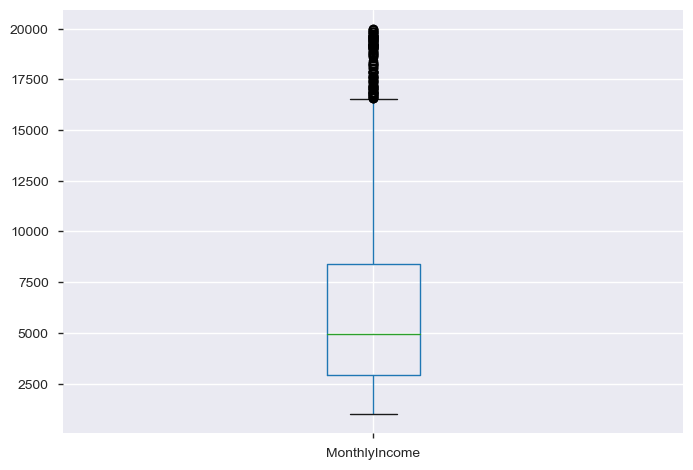

In [105]:
data['MonthlyIncome'].plot(kind='box')

In [106]:
data['Over18'].unique()

array(['Y'], dtype=object)

In [107]:
data.drop(columns='Over18',inplace=True)

In [108]:
data.shape

(1470, 33)

In [109]:
data['StandardHours'].unique()

array([80], dtype=int64)

In [110]:
data.drop(columns='StandardHours',inplace=True)

In [111]:
data.shape

(1470, 32)

In [112]:
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [113]:
data["Attrition"].replace({"Yes":1,"No":0}, inplace = True)

In [114]:
data['Attrition'].unique()

array([1, 0], dtype=int64)

In [115]:
data[data['Attrition'] == 0].shape

(1233, 32)

In [116]:
data[data['Attrition'] == 1].shape

(237, 32)

In [117]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [118]:
data['DailyRate'].isna().sum()

0

In [119]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [120]:
data['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

In [121]:
data['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [122]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [123]:
data['EmployeeNumber'].unique().shape

(1470,)

In [124]:
data.drop(columns='EmployeeNumber',inplace=True)

In [125]:
data['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

In [126]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [127]:
data['HourlyRate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

In [128]:
data['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

In [129]:
data['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [130]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [131]:
data['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

In [132]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [133]:
data['MonthlyIncome'].isna().sum()

0

In [134]:
data['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

In [135]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [136]:
data['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

In [137]:
data['PerformanceRating'].unique()

array([3, 4], dtype=int64)

In [138]:
data['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

In [139]:
data['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [140]:
data['TotalWorkingYears'].unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

In [141]:
data['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

In [142]:
data['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

In [143]:
data['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

In [144]:
data['YearsInCurrentRole'].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

In [145]:
data['YearsSinceLastPromotion'].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14],
      dtype=int64)

In [146]:
data['YearsWithCurrManager'].unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14], dtype=int64)

## Exploratory Data Analysis

In [147]:
data.shape

(1470, 31)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked     

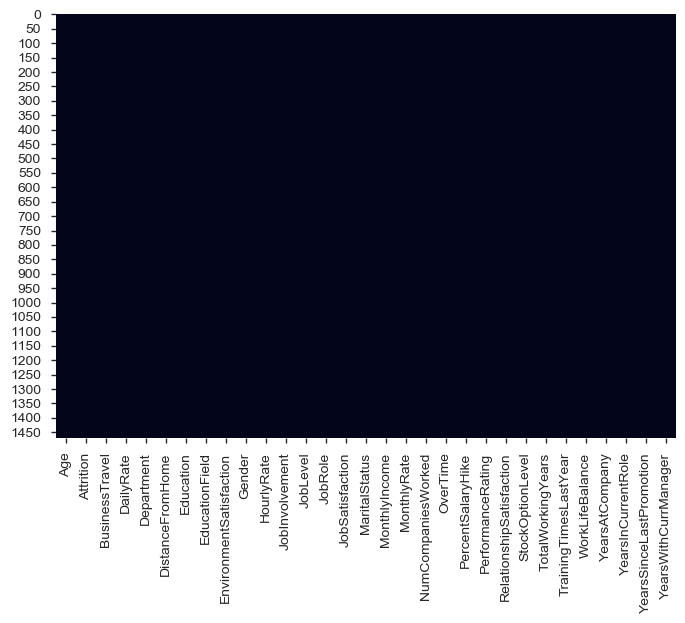

In [149]:
sns.heatmap(data.isnull(), cbar=False)

In [150]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0


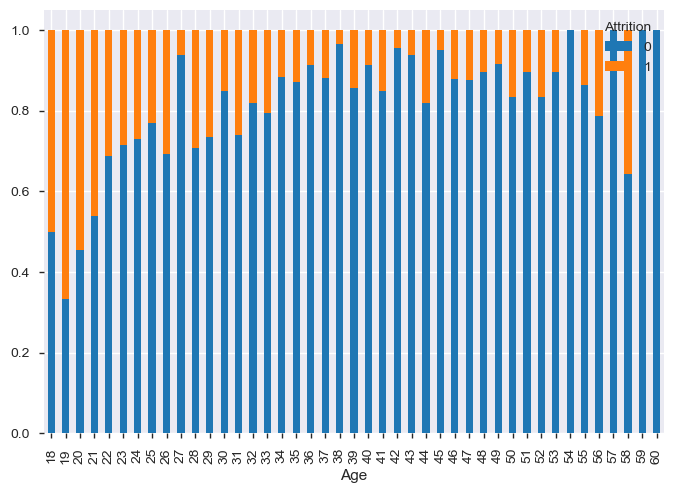

In [151]:
pd.crosstab(data["Age"],data["Attrition"]).div(pd.crosstab(data["Age"],data["Attrition"]).sum(1), axis =0).plot(kind = "bar", stacked= True)

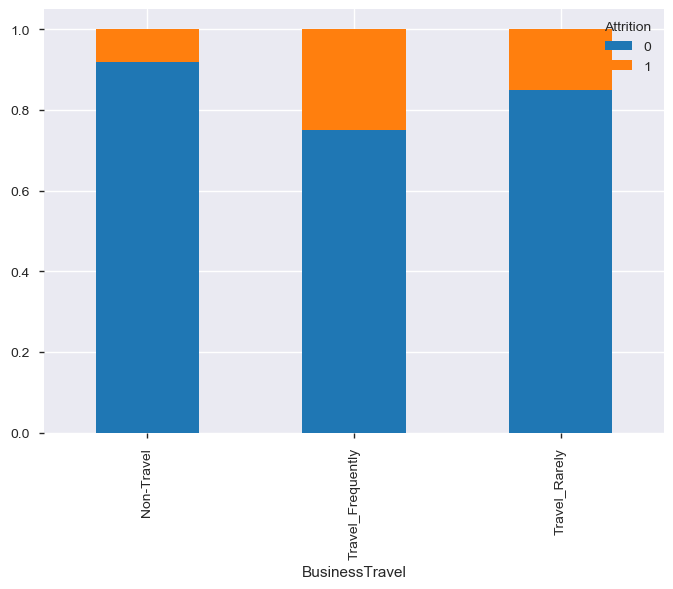

In [152]:
pd.crosstab(data["BusinessTravel"],data["Attrition"]).div(pd.crosstab(data["BusinessTravel"],data["Attrition"]).sum(1), axis =0).plot(kind = "bar", stacked= True)

C:\Users\z023209\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


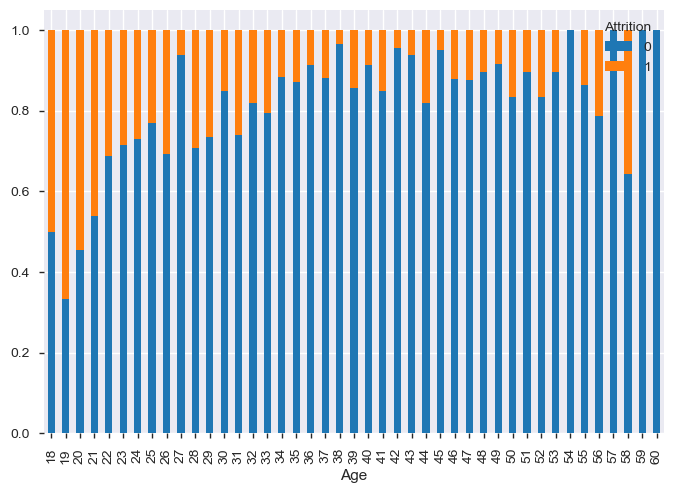

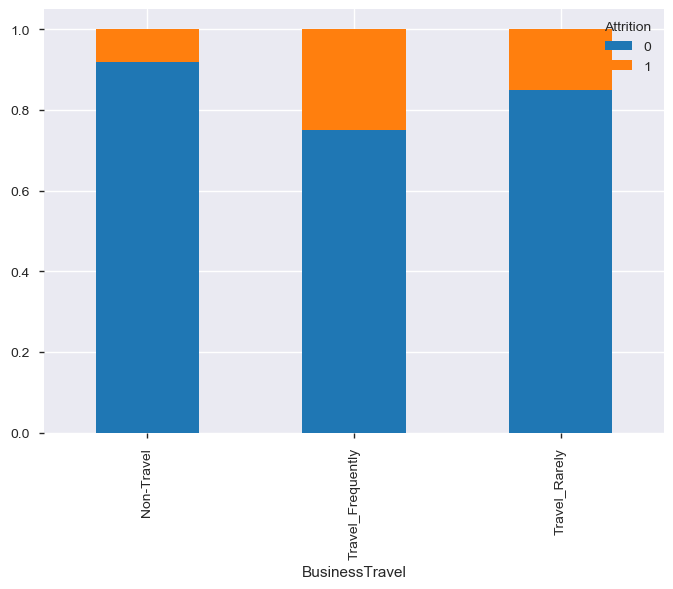

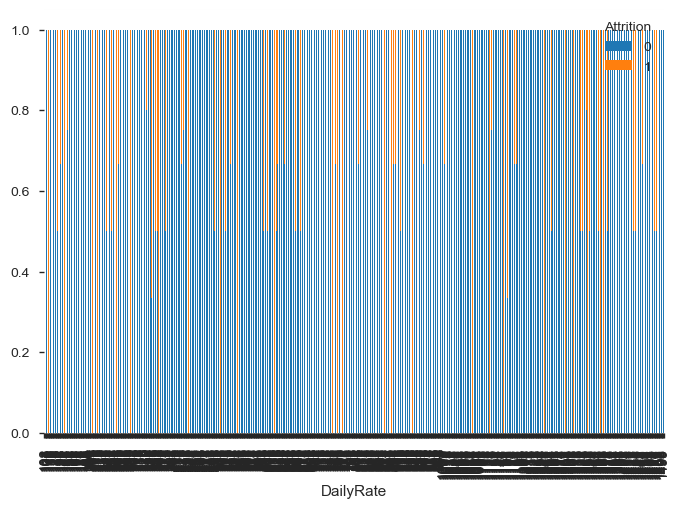

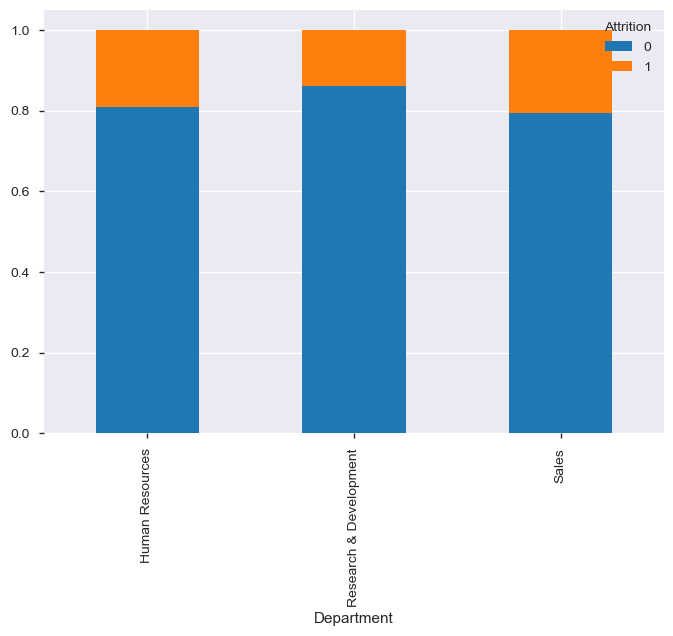

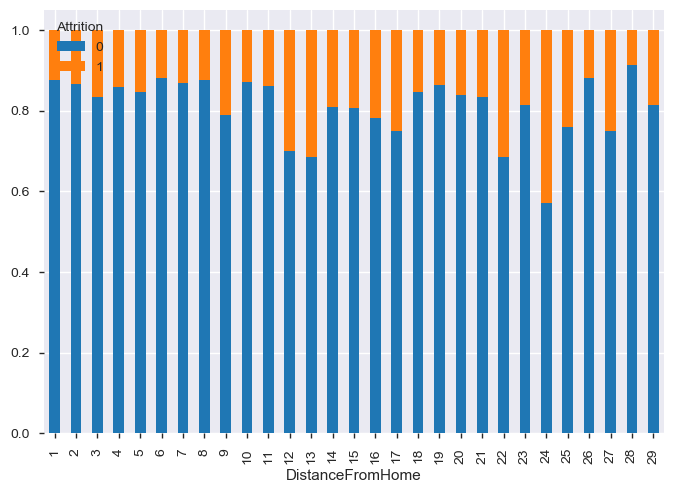

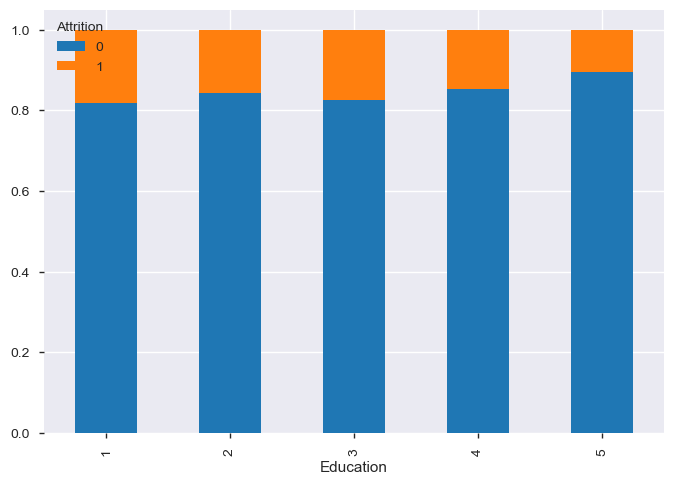

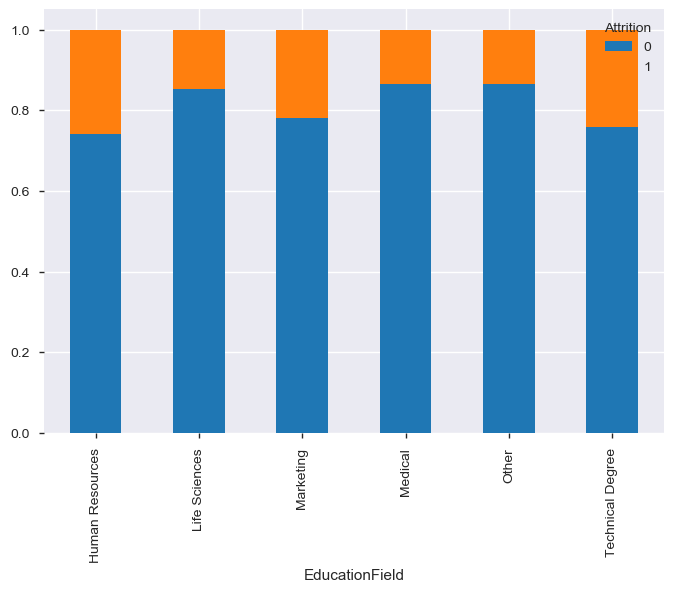

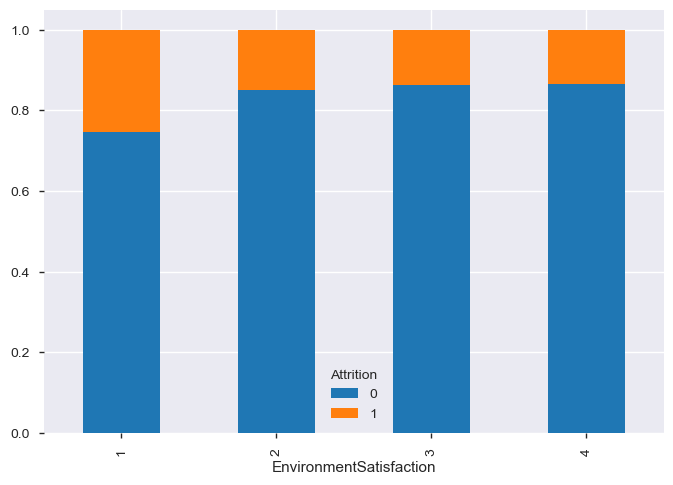

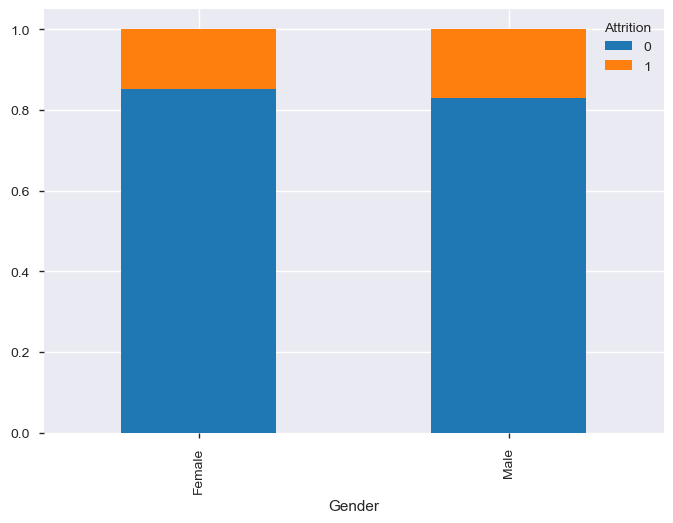

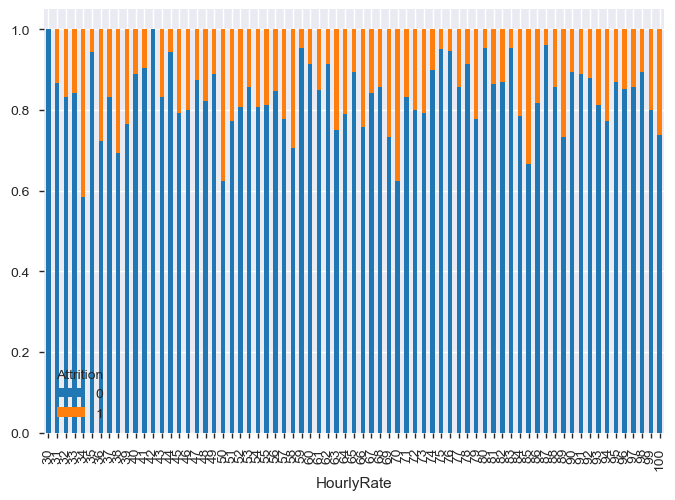

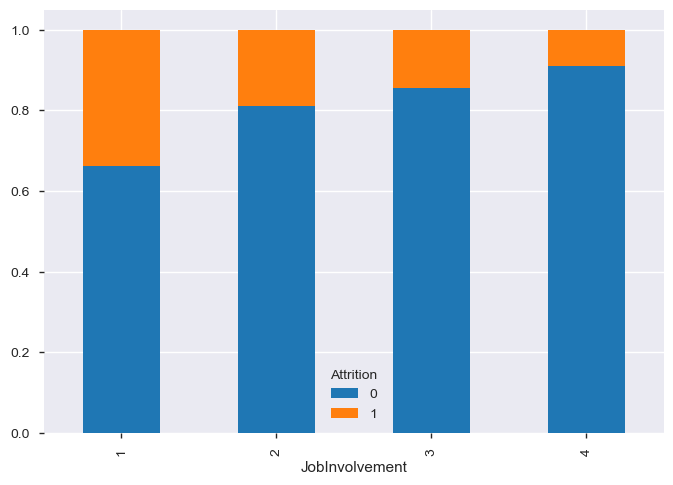

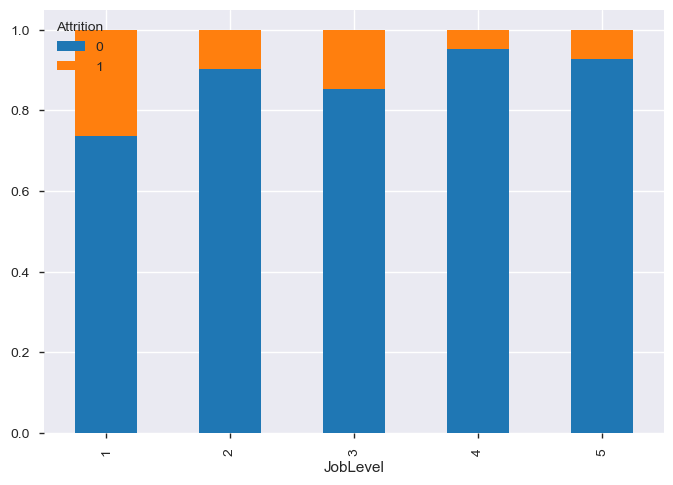

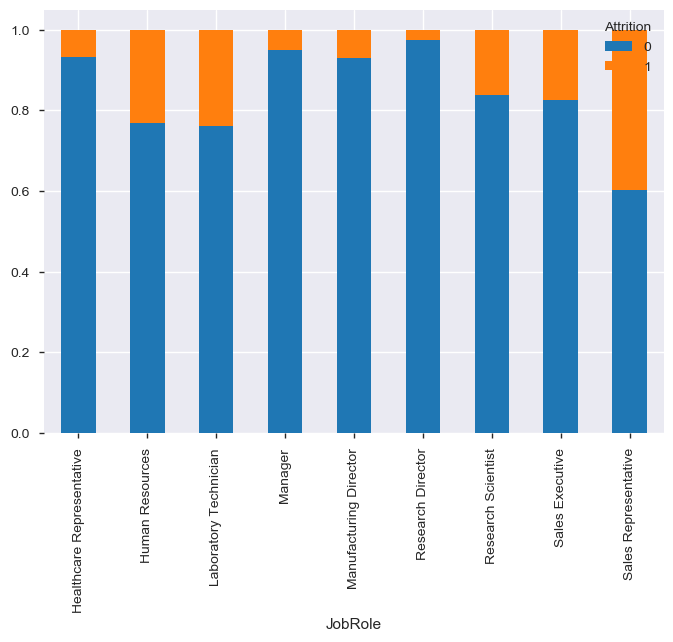

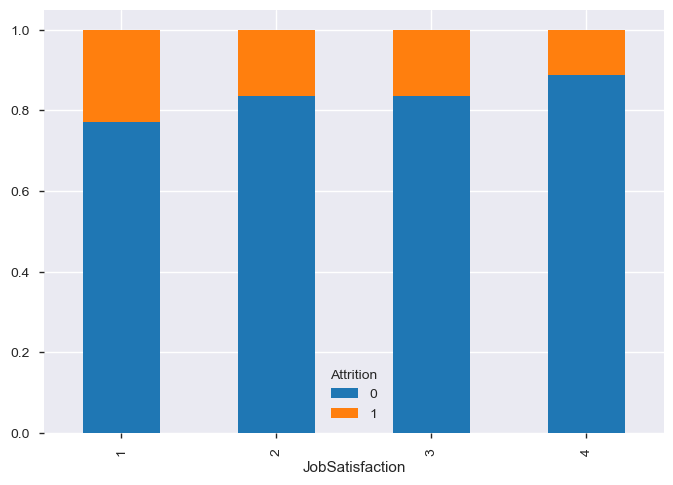

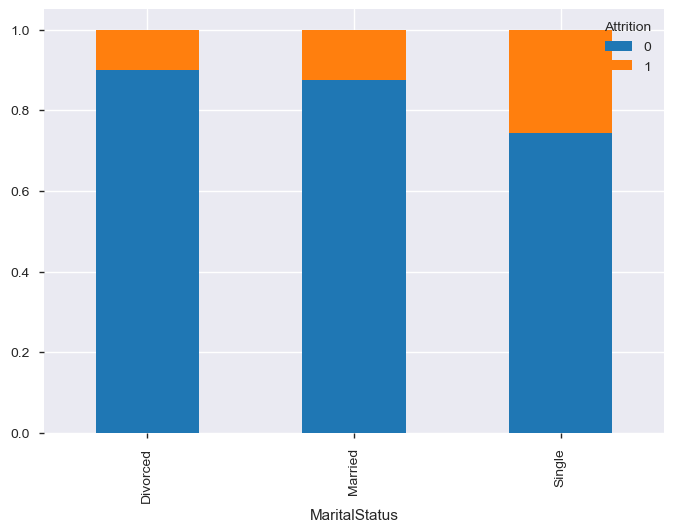

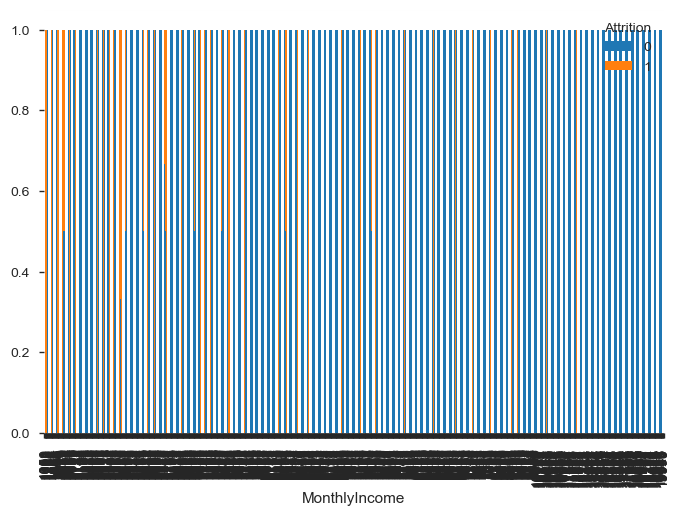

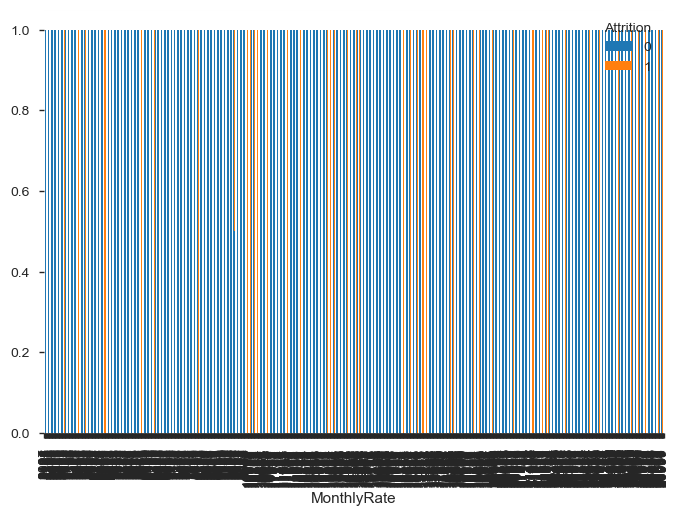

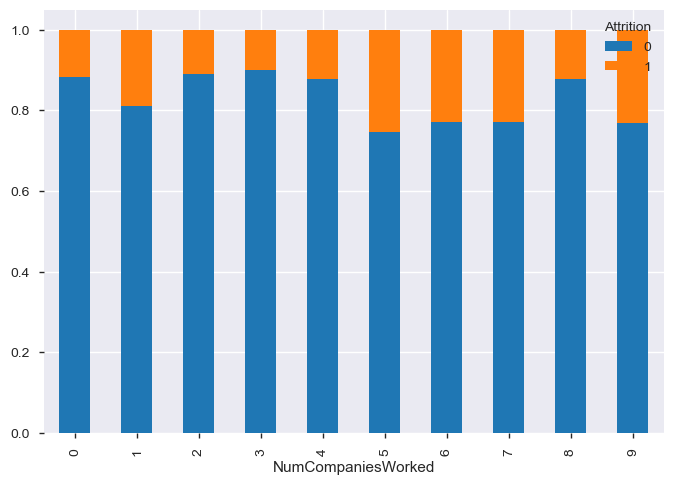

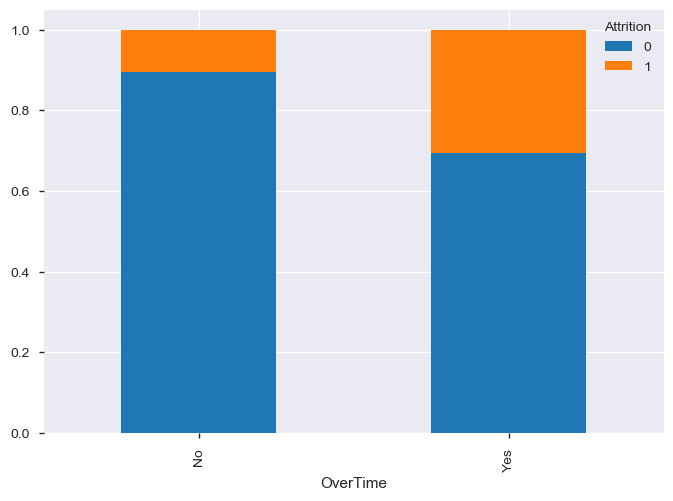

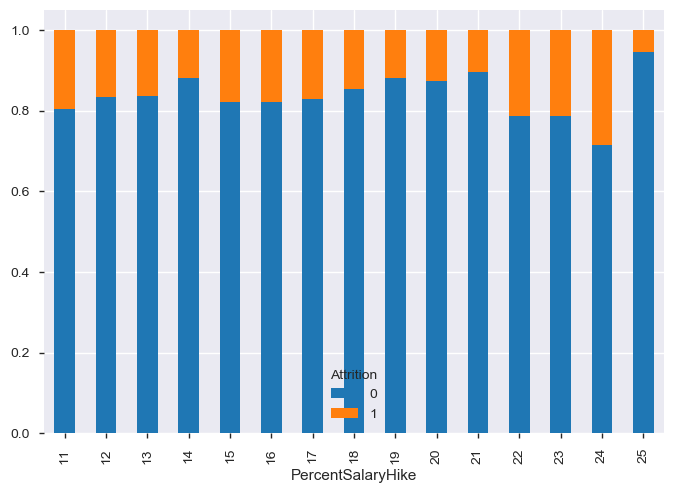

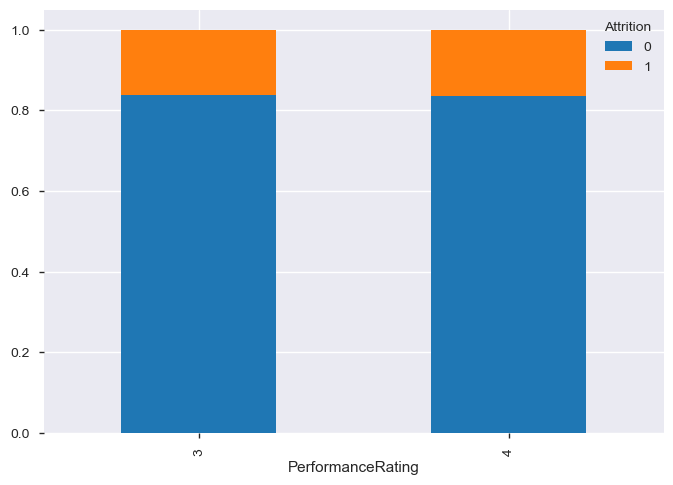

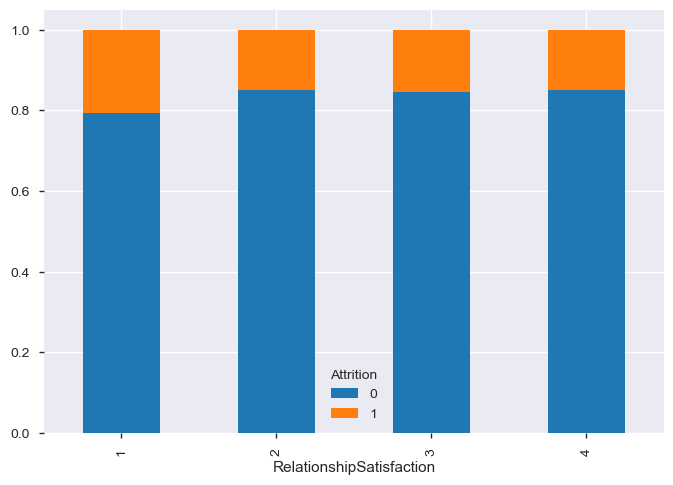

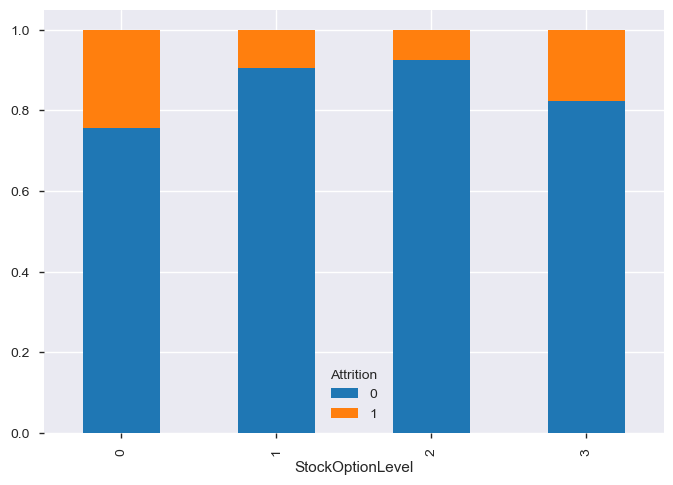

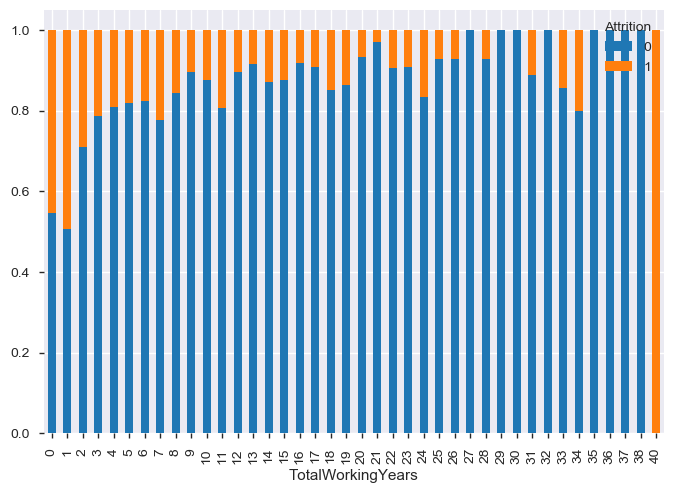

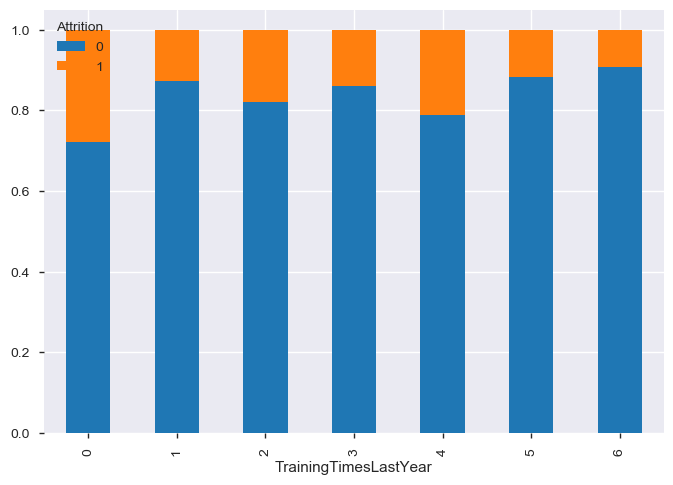

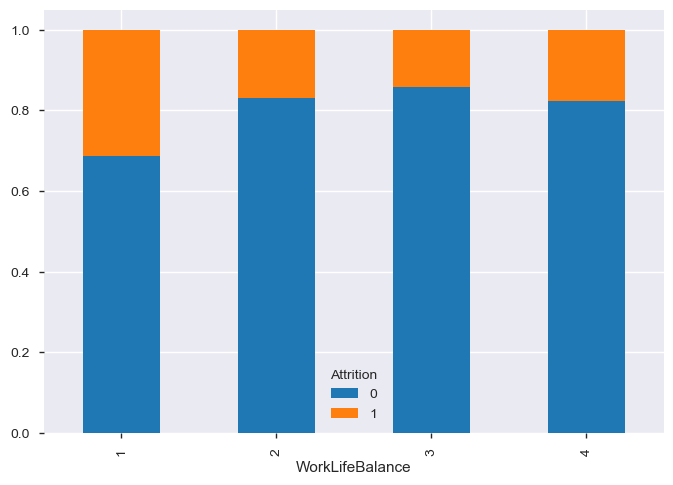

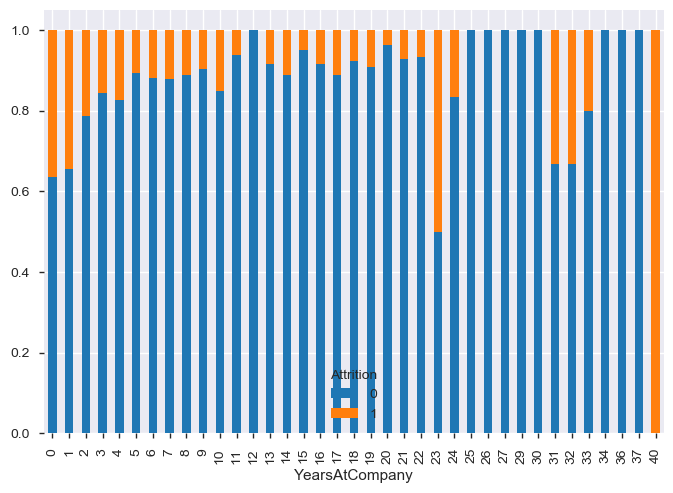

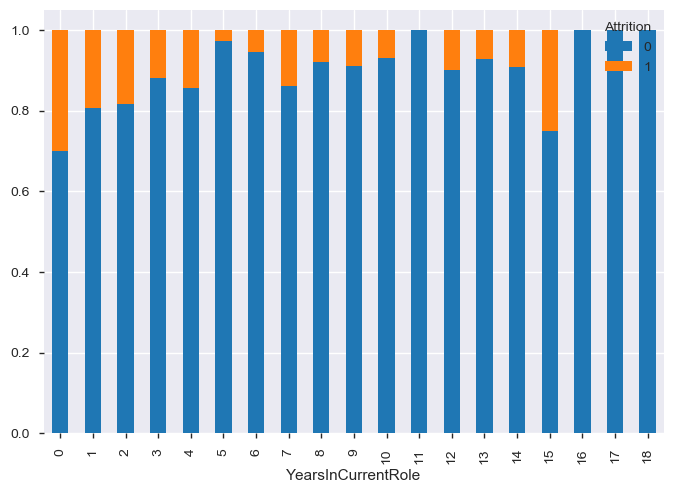

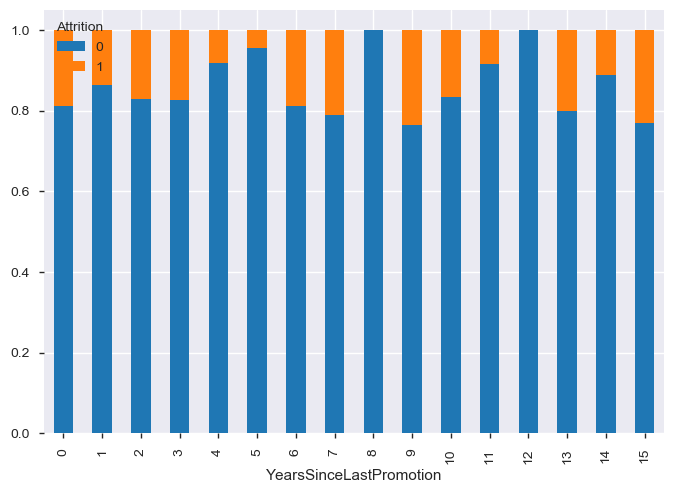

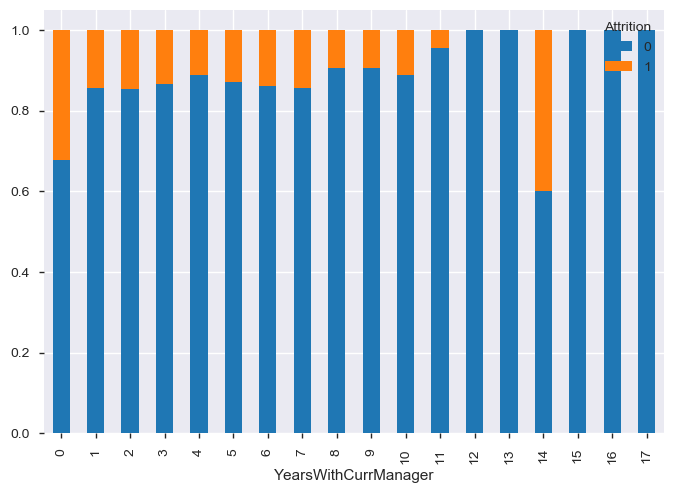

In [153]:
for i in data.columns.to_list():
    if i!='Attrition':
        pd.crosstab(data[i],data["Attrition"]).div(pd.crosstab(data[i],data["Attrition"]).sum(1), axis =0).plot(kind = "bar", stacked= True)

Text(0.5, 1.0, 'Percent Salary Hike Distribuition')

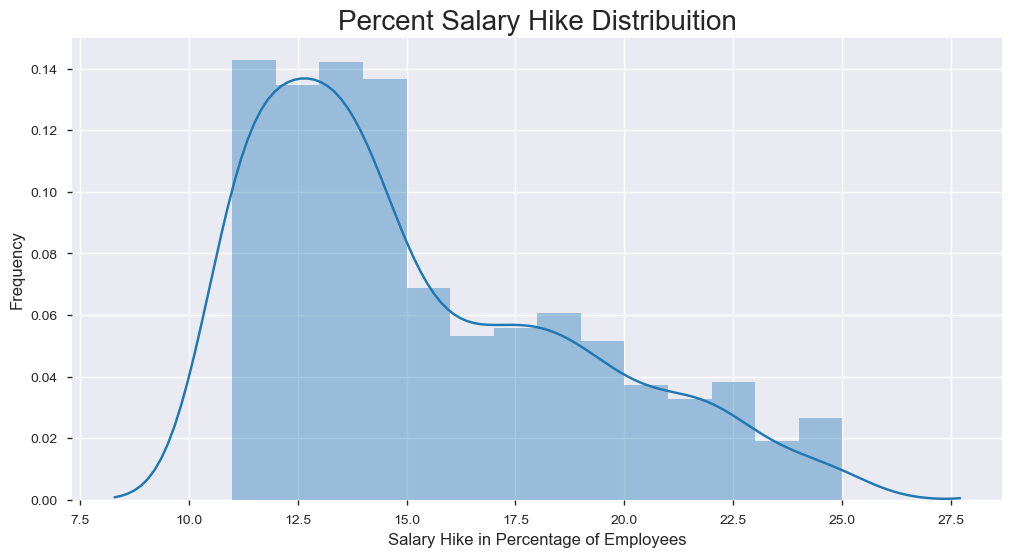

In [154]:
plt.figure(figsize=(12,6))
g = sns.distplot(data["PercentSalaryHike"])
g.set_xlabel("Salary Hike in Percentage of Employees", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Percent Salary Hike Distribuition", fontsize=20)

Text(0, 0.5, 'Monthly Income')

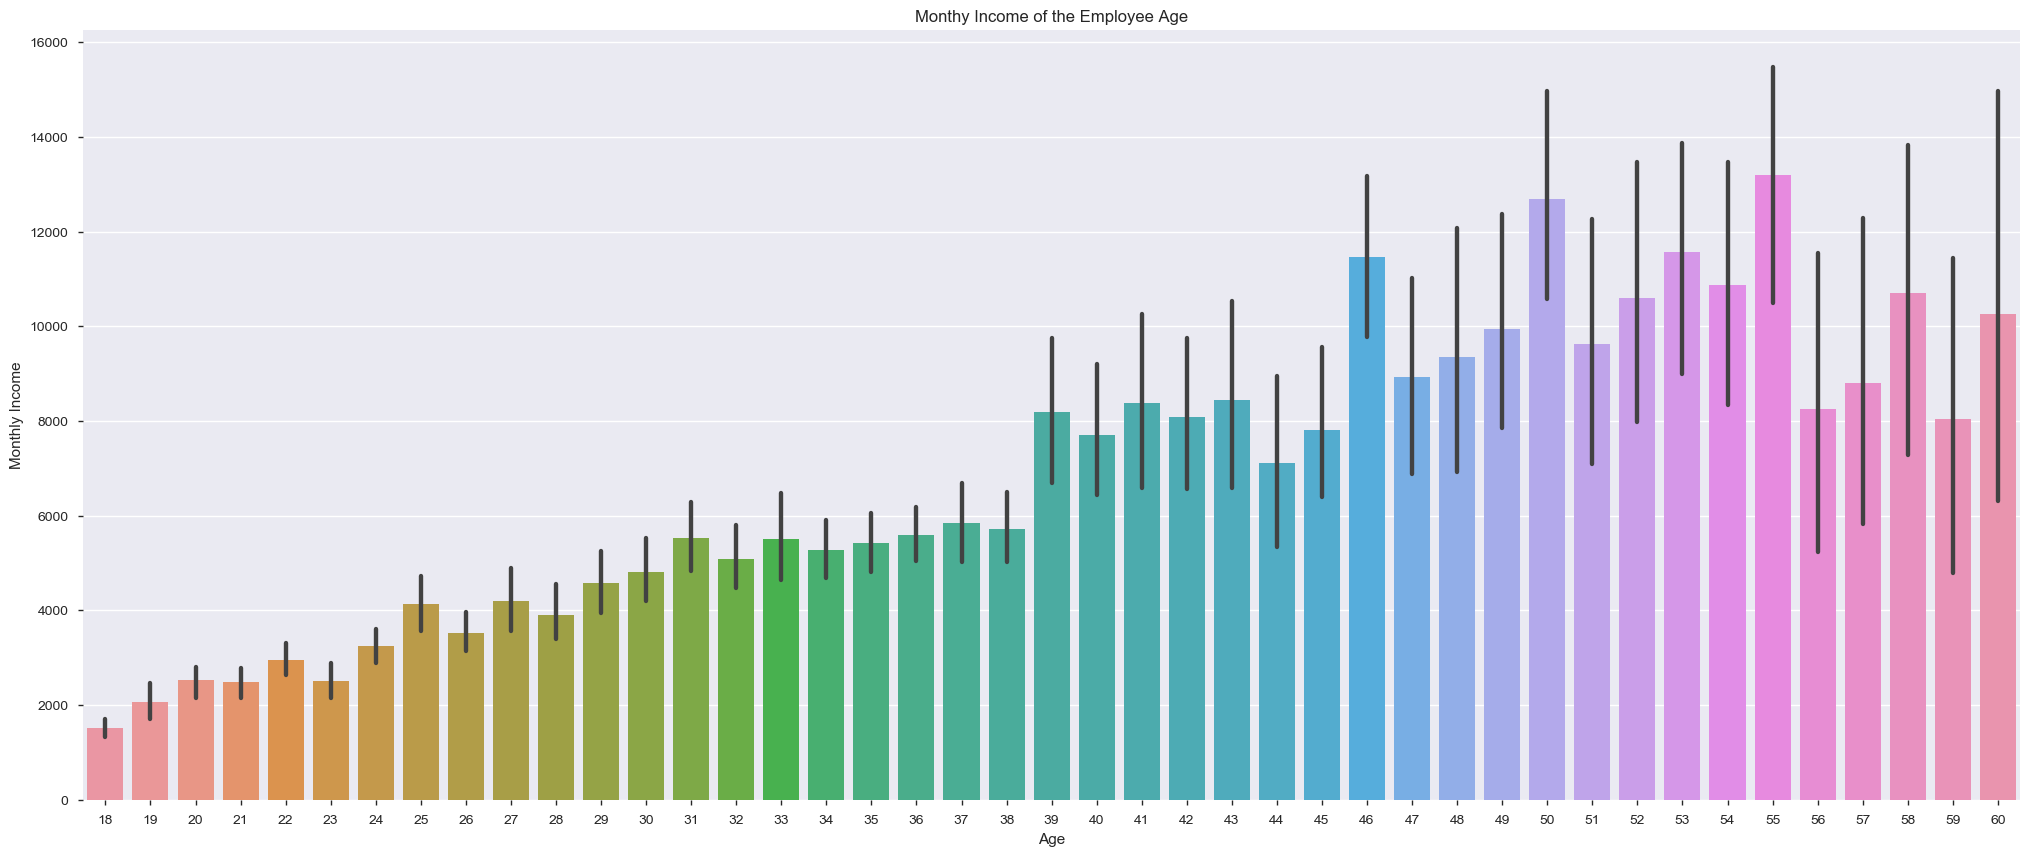

In [155]:
plt.figure(figsize=(25,10))
plt.title("Monthy Income of the Employee Age")
sns.barplot(x=data['Age'], y=data['MonthlyIncome'])

plt.ylabel("Monthly Income")

Text(0, 0.5, 'Monthly Income')

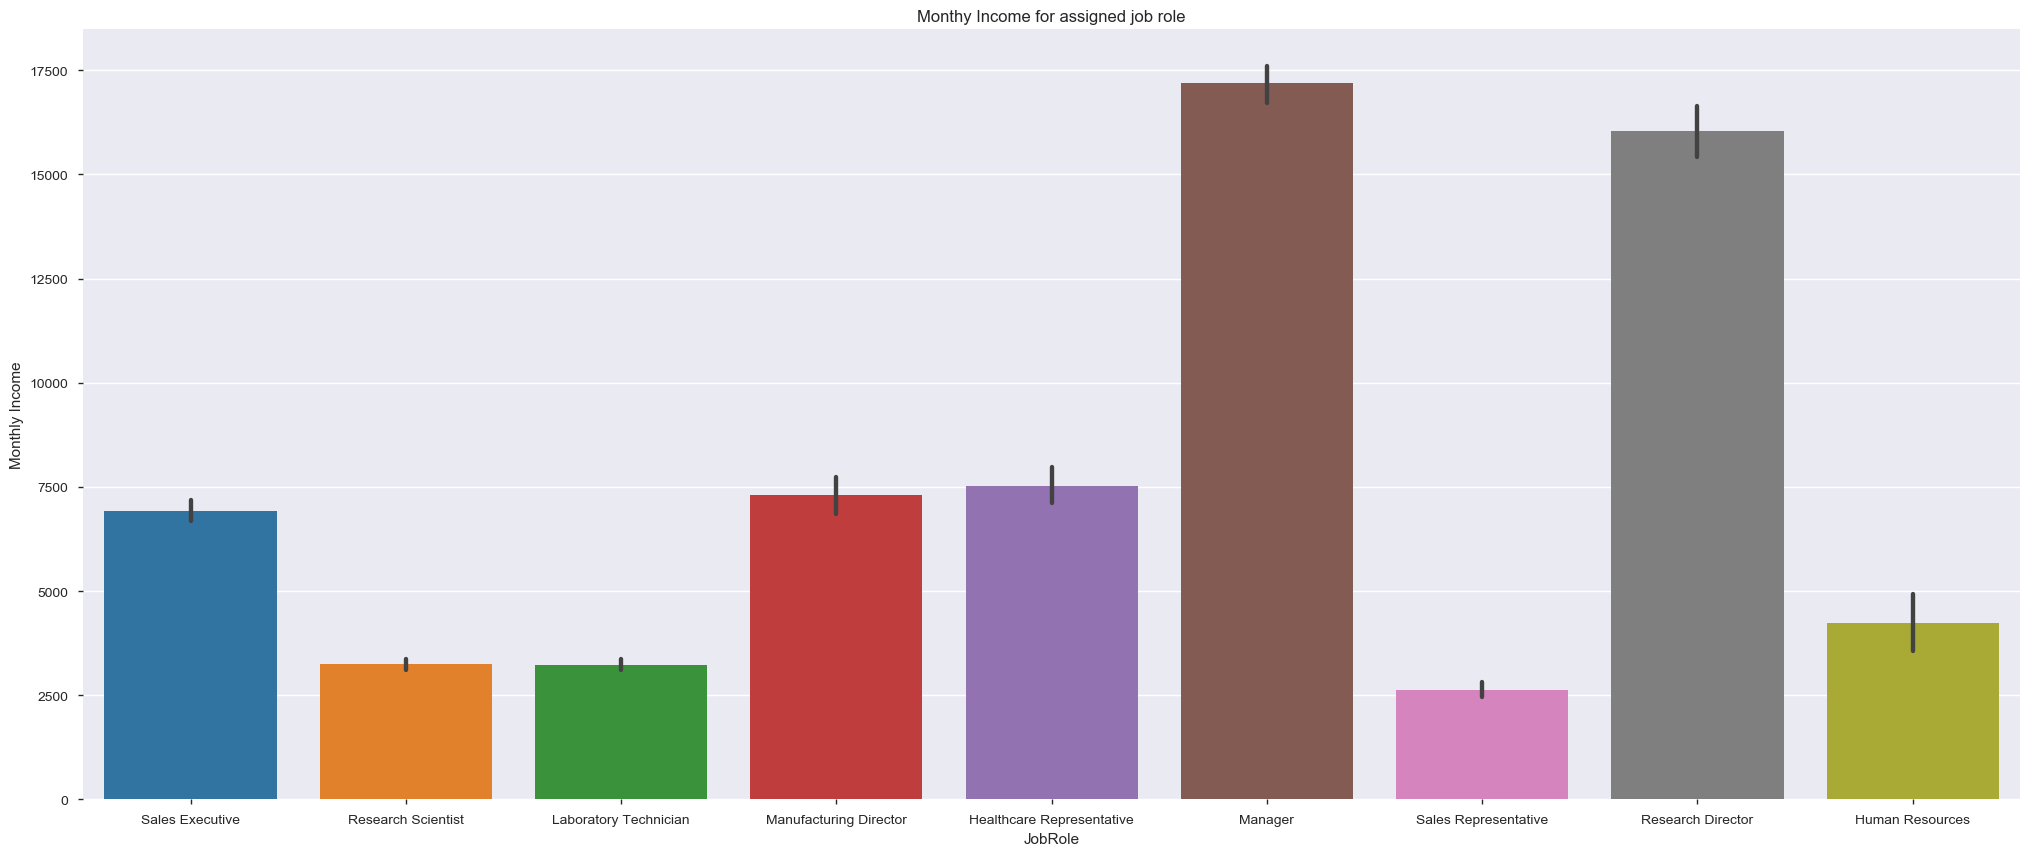

In [156]:
plt.figure(figsize=(25,10))
plt.title("Monthy Income for assigned job role")
sns.barplot(x=data['JobRole'], y=data['MonthlyIncome'])

plt.ylabel("Monthly Income")

Text(0, 0.5, 'Attrition')

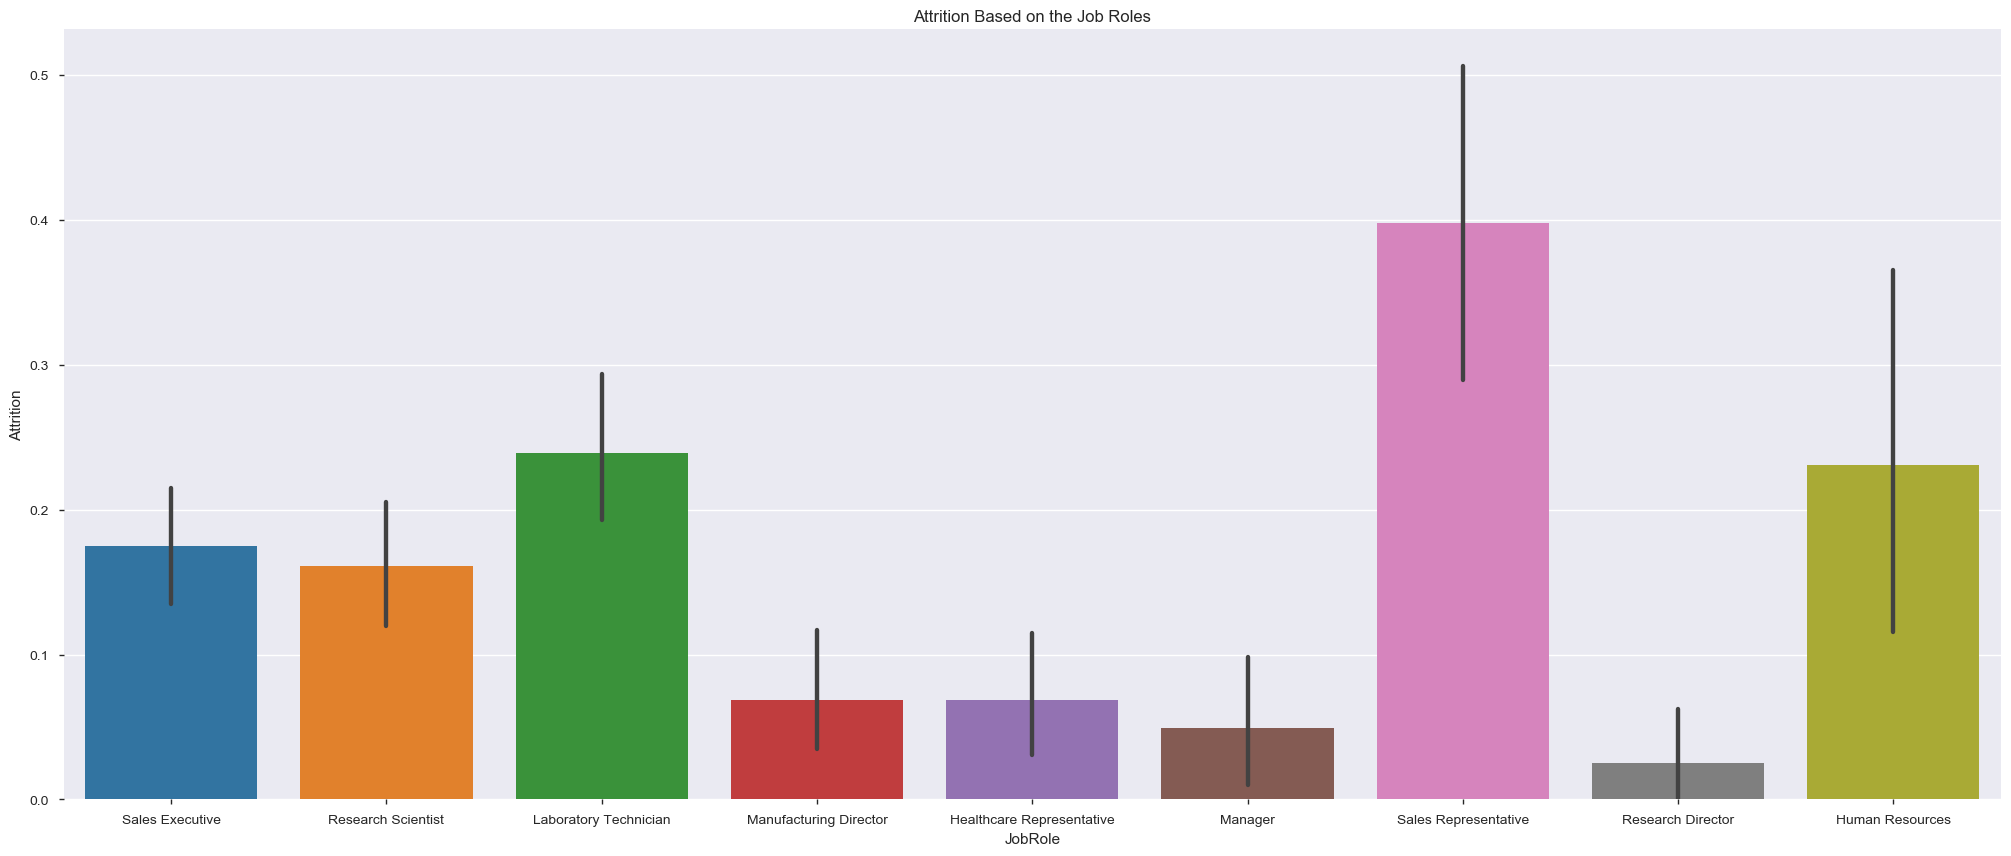

In [157]:
plt.figure(figsize=(25,10))
plt.title("Attrition Based on the Job Roles")
sns.barplot(x=data['JobRole'], y=data['Attrition'])

plt.ylabel("Attrition")

Text(0, 0.5, 'Attrition')

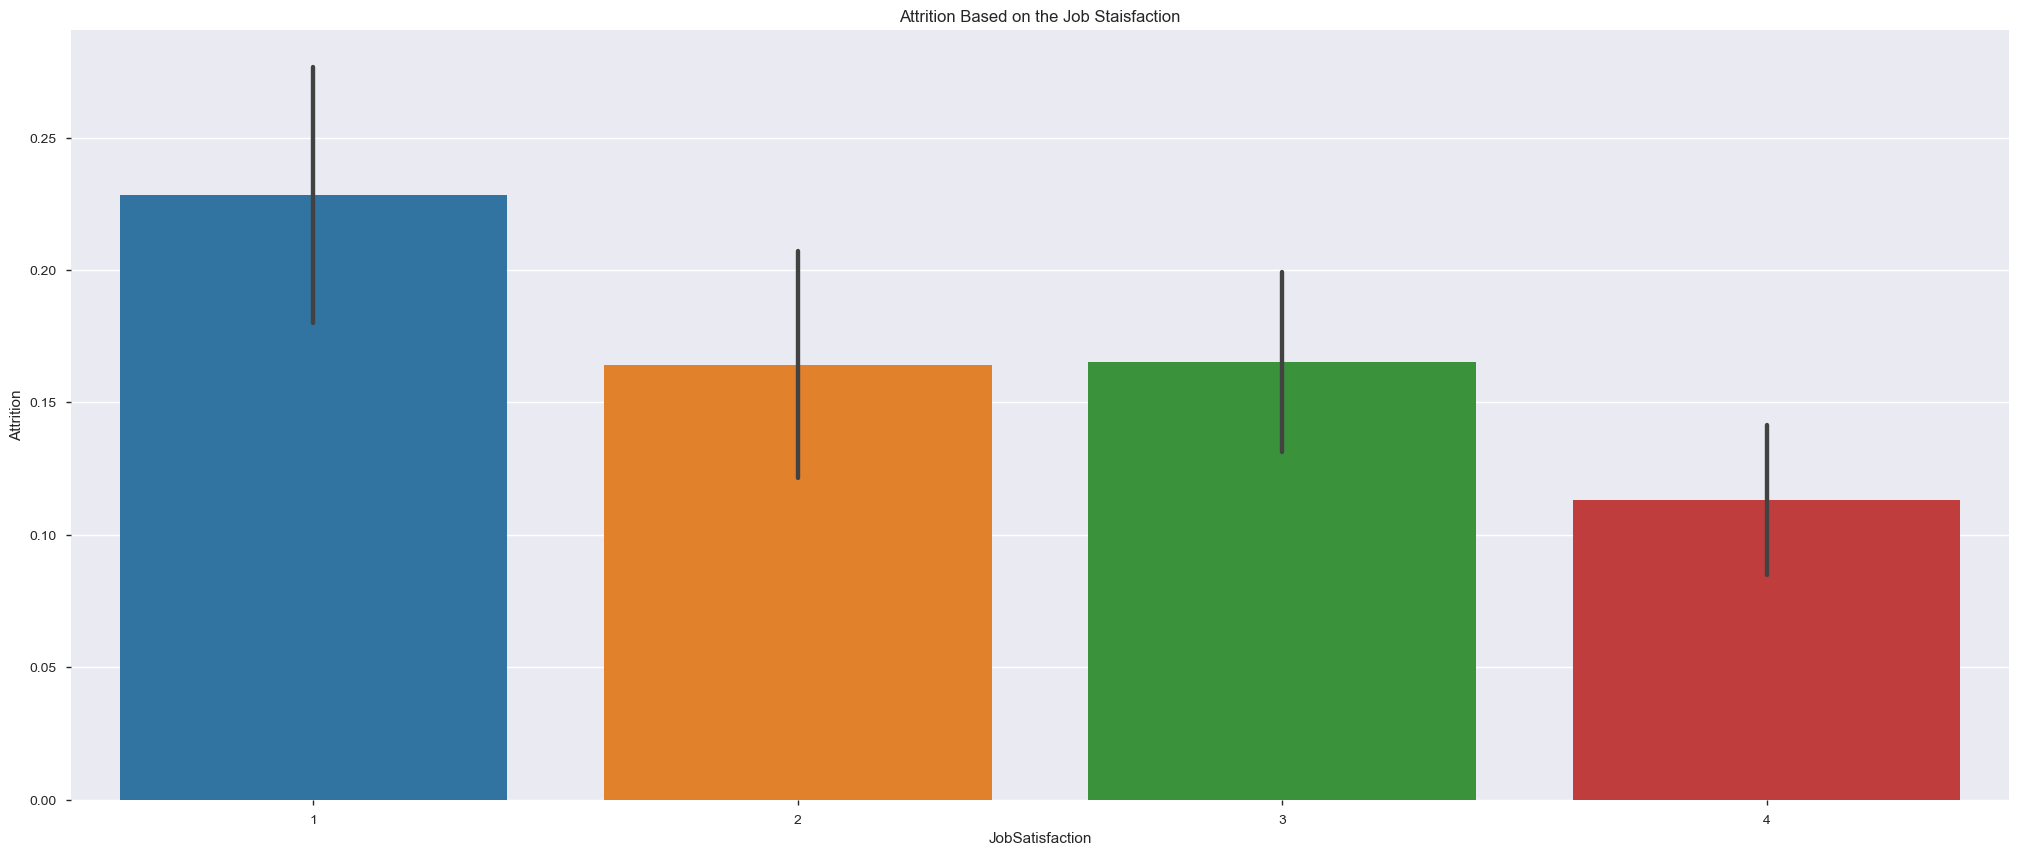

In [158]:
plt.figure(figsize=(25,10))
plt.title("Attrition Based on the Job Staisfaction")
sns.barplot(x=data['JobSatisfaction'], y=data['Attrition'])

plt.ylabel("Attrition")

Text(0, 0.5, 'JobSatisfaction')

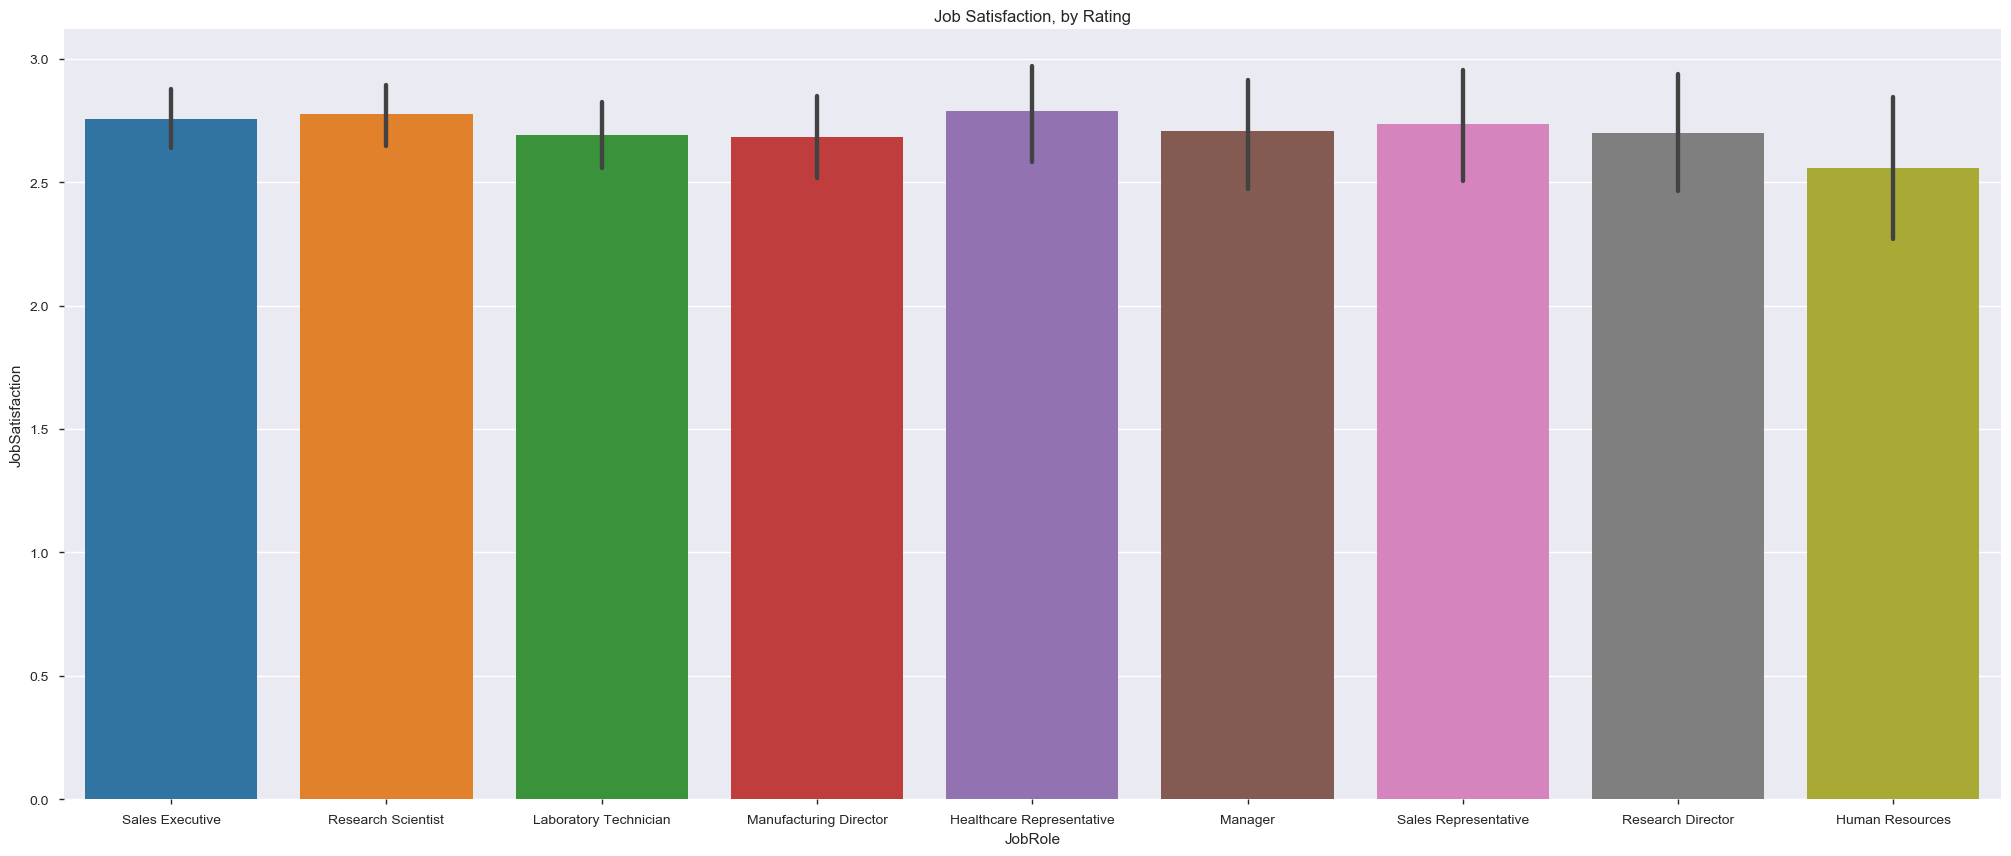

In [159]:
plt.figure(figsize=(25,10))
plt.title("Job Satisfaction, by Rating")
sns.barplot(x=data['JobRole'], y=data['JobSatisfaction'])

plt.ylabel("JobSatisfaction")

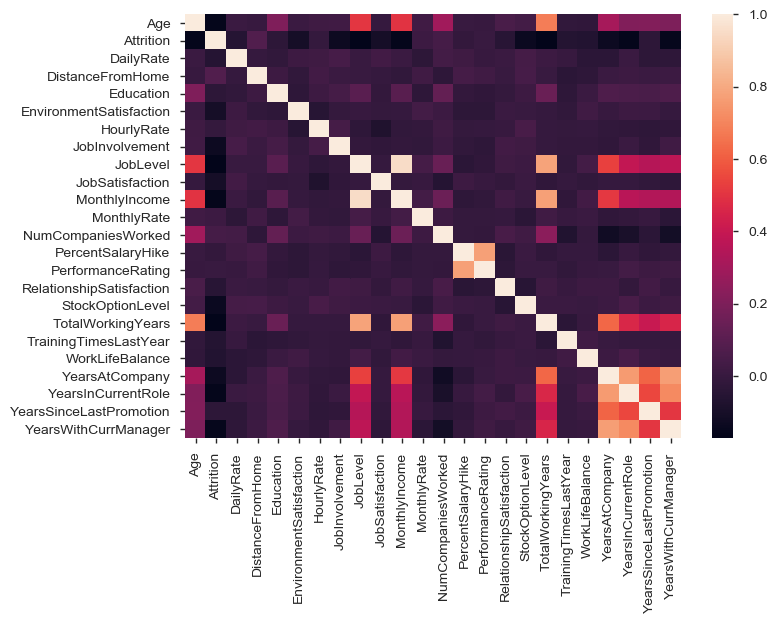

In [160]:
sns.heatmap(data.corr())

## Feature Engineering

In [161]:
encoded_data = pd.get_dummies(data.select_dtypes(exclude=np.number))

In [162]:
numeric_data = data.select_dtypes(include=np.number)

In [163]:
data_preprocessed = pd.concat([encoded_data,numeric_data],axis="columns")

In [164]:
x = data_preprocessed.drop(columns='Attrition')

In [165]:
y = data_preprocessed['Attrition']

In [166]:
pandas_profiling.ProfileReport(data)

Number of variables,31
Number of observations,1470
Total Missing (%),0.0%
Total size in memory,356.1 KiB
Average record size in memory,248.1 B
Numeric,21
Categorical,7
Boolean,2
Date,0
Text (Unique),0
Rejected,1


## Modeling

In [167]:
def roc_draw(x_test, y_test,logreg):
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [168]:
def model_fit(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    model.predict_proba(x_train)
    y_train_predicted = model.predict(x_train);
    print(" Train Confusion Matrix :",confusion_matrix(y_train,y_train_predicted))
    print(" Train Accuracy :",accuracy_score(y_train,y_train_predicted))
    print(" Train Recall :",recall_score(y_train,y_train_predicted))
    print(classification_report(y_train,y_train_predicted))
    y_test_predicted = model.predict(x_test);
    print(" Tet Confusion Matrix :",confusion_matrix(y_test,y_test_predicted))
    print(" Test Accuracy :",accuracy_score(y_test,y_test_predicted))
    print(" Test Recall :",recall_score(y_test,y_test_predicted))
    print(classification_report(y_test,y_test_predicted))
    roc_draw(x_train, y_train,model)

In [169]:
logistic = LogisticRegression()

In [170]:
std = StandardScaler()
X_std = std.fit_transform(x)

In [171]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3, random_state = 0)

In [172]:
x_train.shape

(1029, 51)

In [173]:
x_test.shape

(441, 51)

In [174]:
y_train.shape

(1029,)

In [175]:
y_test.shape

(441,)

C:\Users\z023209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 Train Confusion Matrix : [[842  20]
 [ 90  77]]
 Train Accuracy : 0.8931000971817298
 Train Recall : 0.46107784431137727
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       862
           1       0.79      0.46      0.58       167

    accuracy                           0.89      1029
   macro avg       0.85      0.72      0.76      1029
weighted avg       0.89      0.89      0.88      1029

 Tet Confusion Matrix : [[360  11]
 [ 40  30]]
 Test Accuracy : 0.8843537414965986
 Test Recall : 0.42857142857142855
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       371
           1       0.73      0.43      0.54        70

    accuracy                           0.88       441
   macro avg       0.82      0.70      0.74       441
weighted avg       0.87      0.88      0.87       441



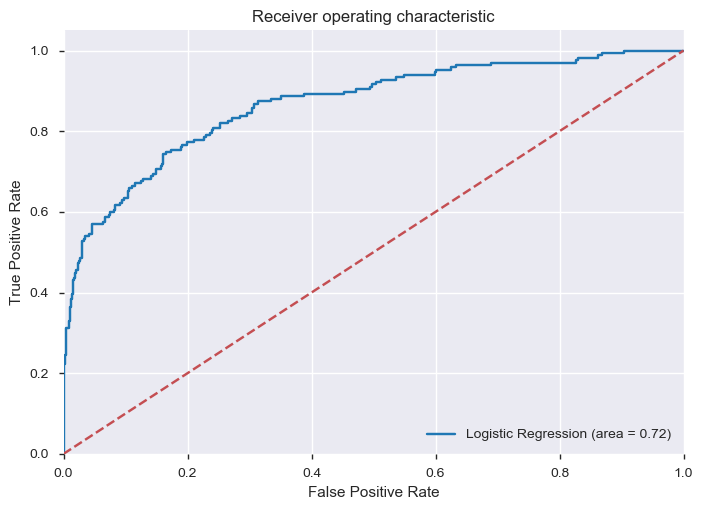

In [176]:
model_fit(logistic,x_train,x_test,y_train,y_test)

 Train Confusion Matrix : [[856   6]
 [123  44]]
 Train Accuracy : 0.8746355685131195
 Train Recall : 0.2634730538922156
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       862
           1       0.88      0.26      0.41       167

    accuracy                           0.87      1029
   macro avg       0.88      0.63      0.67      1029
weighted avg       0.88      0.87      0.84      1029

 Tet Confusion Matrix : [[363   8]
 [ 55  15]]
 Test Accuracy : 0.8571428571428571
 Test Recall : 0.21428571428571427
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       371
           1       0.65      0.21      0.32        70

    accuracy                           0.86       441
   macro avg       0.76      0.60      0.62       441
weighted avg       0.83      0.86      0.83       441



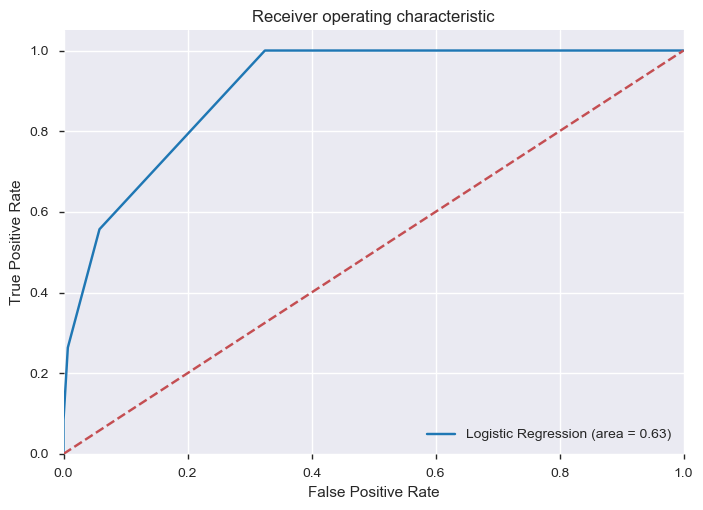

In [177]:
knn = KNeighborsClassifier()
model_fit(knn,x_train,x_test,y_train,y_test)

 Train Confusion Matrix : [[767  95]
 [ 66 101]]
 Train Accuracy : 0.8435374149659864
 Train Recall : 0.6047904191616766
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       862
           1       0.52      0.60      0.56       167

    accuracy                           0.84      1029
   macro avg       0.72      0.75      0.73      1029
weighted avg       0.85      0.84      0.85      1029

 Tet Confusion Matrix : [[330  41]
 [ 29  41]]
 Test Accuracy : 0.8412698412698413
 Test Recall : 0.5857142857142857
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       371
           1       0.50      0.59      0.54        70

    accuracy                           0.84       441
   macro avg       0.71      0.74      0.72       441
weighted avg       0.85      0.84      0.85       441



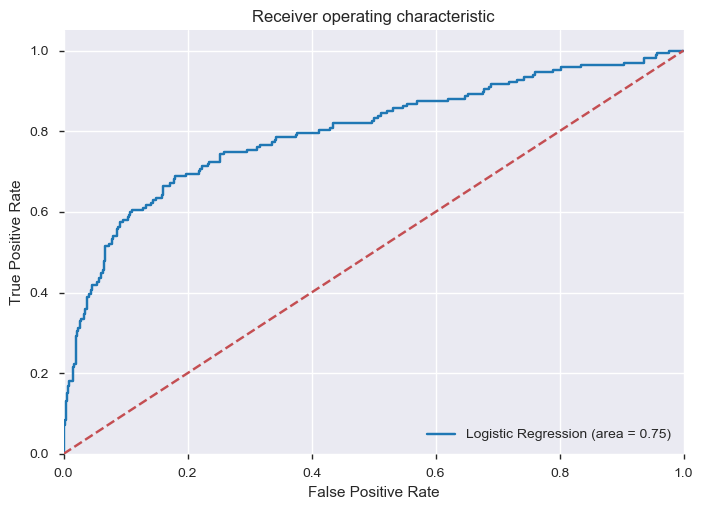

In [178]:
bnb = BernoulliNB()
model_fit(bnb,x_train,x_test,y_train,y_test)

 Train Confusion Matrix : [[767  95]
 [ 66 101]]
 Train Accuracy : 0.8435374149659864
 Train Recall : 0.6047904191616766
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       862
           1       0.52      0.60      0.56       167

    accuracy                           0.84      1029
   macro avg       0.72      0.75      0.73      1029
weighted avg       0.85      0.84      0.85      1029

 Tet Confusion Matrix : [[330  41]
 [ 29  41]]
 Test Accuracy : 0.8412698412698413
 Test Recall : 0.5857142857142857
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       371
           1       0.50      0.59      0.54        70

    accuracy                           0.84       441
   macro avg       0.71      0.74      0.72       441
weighted avg       0.85      0.84      0.85       441



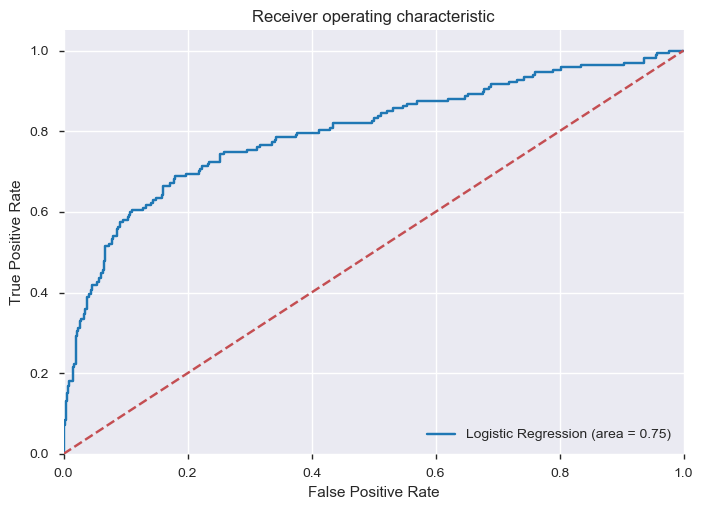

In [179]:
nb = GaussianNB()
model_fit(bnb,x_train,x_test,y_train,y_test)